In [117]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from surprise import SVD
from surprise import Dataset,Reader,KNNBasic
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [119]:
reader = Reader(line_format="user item rating timestamp", sep=",", skip_lines = 1)
data = Dataset.load_from_file("./ratings_small.csv", reader=reader)

In [120]:
# Use the famous SVD algorithm.
algo = SVD(biased=False)

# Run 5-fold cross-validation and print results.
pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0116  1.0154  1.0151  1.0043  1.0012  1.0095  0.0058  
MAE (testset)     0.7779  0.7826  0.7829  0.7770  0.7749  0.7791  0.0032  
Fit time          10.96   7.75    5.37    5.80    5.19    7.01    2.17    
Test time         0.30    0.71    0.23    0.15    0.15    0.31    0.21    


In [121]:
pmf_mae = pmf['test_mae'].mean()
pmf_rmse = pmf['test_rmse'].mean()
print('The average MAE of the PMF under the 5-folds cross-validation is : %.3f' % pmf_mae)
print('The average RMSE of the PMF under the 5-folds cross-validation is : %.3f' % pmf_rmse)

The average MAE of the PMF under the 5-folds cross-validation is : 0.779
The average RMSE of the PMF under the 5-folds cross-validation is : 1.010


In [122]:
user_based_CF = KNNBasic(sim_options={'user_based': True})

# Run 5-fold cross-validation and print results.
UBCF = cross_validate(user_based_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9710  0.9678  0.9681  0.9687  0.9704  0.9692  0.0013  
MAE (testset)     0.7445  0.7450  0.7445  0.7434  0.7480  0.7451  0.0015  
Fit time          0.17    0.34    0.43    0.43    0.21    0.32    0.11    
Test time         3.06    4.74    3.68    2.06    1.82    3.07    1.07    


In [123]:
ubcf_mae = UBCF['test_mae'].mean()
ubcf_rmse = UBCF['test_rmse'].mean()
print('The average MAE of the User based Collaborative Filtering under the 5-folds cross-validation is : %.3f' % ubcf_mae)
print('The average RMSE of the User based Collaborative Filtering under the 5-folds cross-validation is : %.3f' % ubcf_rmse)

The average MAE of the User based Collaborative Filtering under the 5-folds cross-validation is : 0.745
The average RMSE of the User based Collaborative Filtering under the 5-folds cross-validation is : 0.969


In [124]:
item_based_CF = KNNBasic(sim_options={'user_based': False})

# Run 5-fold cross-validation and print results.
IBCF = cross_validate(item_based_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9388  0.9276  0.9347  0.9362  0.9381  0.9351  0.0040  
MAE (testset)     0.7237  0.7160  0.7224  0.7231  0.7209  0.7212  0.0028  
Fit time          9.89    5.90    5.31    5.62    5.58    6.46    1.73    
Test time         8.62    7.84    7.65    7.99    8.00    8.02    0.32    


In [125]:
ibcf_mae = IBCF['test_mae'].mean()
ibcf_rmse = IBCF['test_rmse'].mean()
print('The average MAE of the Item based Collaborative Filtering under the 5-folds cross-validation is : %.3f' % ibcf_mae)
print('The average RMSE of the Item based Collaborative Filtering under the 5-folds cross-validation is : %.3f' % ibcf_rmse)

The average MAE of the Item based Collaborative Filtering under the 5-folds cross-validation is : 0.721
The average RMSE of the Item based Collaborative Filtering under the 5-folds cross-validation is : 0.935


In [126]:
cosine_sim_ub = KNNBasic(sim_options={"name": "cosine","user_based": True})
cosine_sim_ib = KNNBasic(sim_options={"name": "cosine","user_based": False})
cosine_ubcf = cross_validate(cosine_sim_ub, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cosine_ibcf = cross_validate(cosine_sim_ib, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9930  0.9911  0.9974  0.9960  0.9901  0.9935  0.0028  
MAE (testset)     0.7688  0.7669  0.7702  0.7666  0.7640  0.7673  0.0021  
Fit time          0.40    0.75    0.46    0.45    0.38    0.49    0.13    
Test time         1.68    2.78    1.79    1.62    1.57    1.89    0.45    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [127]:
msd_sim_ub = KNNBasic(sim_options={"name": "msd","user_based": True})
msd_sim_ib = KNNBasic(sim_options={"name": "msd","user_based": False})
msd_ubcf = cross_validate(msd_sim_ub, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
msd_ibcf = cross_validate(msd_sim_ib, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9667  0.9731  0.9701  0.9692  0.9630  0.9684  0.0034  
MAE (testset)     0.7437  0.7477  0.7462  0.7447  0.7386  0.7442  0.0031  
Fit time          0.18    0.21    0.17    0.17    0.25    0.19    0.03    
Test time         1.79    1.64    1.60    1.82    2.72    1.92    0.41    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [128]:
pearson_sim_ub = KNNBasic(sim_options={"name": "pearson","user_based": True})
pearson_sim_ib = KNNBasic(sim_options={"name": "pearson","user_based": False})
pearson_ubcf = cross_validate(pearson_sim_ub, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pearson_ibcf = cross_validate(pearson_sim_ib, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9896  1.0017  0.9924  1.0151  1.0012  1.0000  0.0089  
MAE (testset)     0.7680  0.7737  0.7663  0.7854  0.7754  0.7738  0.0068  
Fit time          0.58    0.62    0.58    0.70    0.61    0.62    0.04    
Test time         1.71    1.69    1.59    2.56    2.05    1.92    0.35    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson simil

In [129]:
print('===== User based Collaborative Filtering =====')
print('The average MAE of the User based Collaborative Filtering using cosine is : %.3f' % cosine_ubcf['test_mae'].mean())
print('The average RMSE of the User based Collaborative Filtering using cosine is : %.3f' % cosine_ubcf['test_rmse'].mean())
print('The average MAE of the User based Collaborative Filtering using MSD is : %.3f' % msd_ubcf['test_mae'].mean())
print('The average RMSE of the User based Collaborative Filtering using MSD is : %.3f' % msd_ubcf['test_rmse'].mean())
print('The average MAE of the User based Collaborative Filtering using pearson is : %.3f' % pearson_ubcf['test_mae'].mean())
print('The average RMSE of the User based Collaborative Filtering using pearson is : %.3f' % pearson_ubcf['test_rmse'].mean())


print('===== Item based Collaborative Filtering =====')
print('The average MAE of the Item based Collaborative Filtering using cosine is : %.3f' % cosine_ibcf['test_mae'].mean())
print('The average RMSE of the Item based Collaborative Filtering using cosine is : %.3f' % cosine_ibcf['test_rmse'].mean())
print('The average MAE of the Item based Collaborative Filtering using MSD is : %.3f' % msd_ibcf['test_mae'].mean())
print('The average RMSE of the Item based Collaborative Filtering using MSD is : %.3f' % msd_ibcf['test_rmse'].mean())
print('The average MAE of the Item based Collaborative Filtering using pearson is : %.3f' % pearson_ibcf['test_mae'].mean())
print('The average RMSE of the Item based Collaborative Filtering using pearson is : %.3f' % pearson_ibcf['test_rmse'].mean())

===== User based Collaborative Filtering =====
The average MAE of the User based Collaborative Filtering using cosine is : 0.767
The average RMSE of the User based Collaborative Filtering using cosine is : 0.993
The average MAE of the User based Collaborative Filtering using MSD is : 0.744
The average RMSE of the User based Collaborative Filtering using MSD is : 0.968
The average MAE of the User based Collaborative Filtering using pearson is : 0.774
The average RMSE of the User based Collaborative Filtering using pearson is : 1.000
===== Item based Collaborative Filtering =====
The average MAE of the Item based Collaborative Filtering using cosine is : 0.775
The average RMSE of the Item based Collaborative Filtering using cosine is : 0.995
The average MAE of the Item based Collaborative Filtering using MSD is : 0.721
The average RMSE of the Item based Collaborative Filtering using MSD is : 0.935
The average MAE of the Item based Collaborative Filtering using pearson is : 0.768
The aver

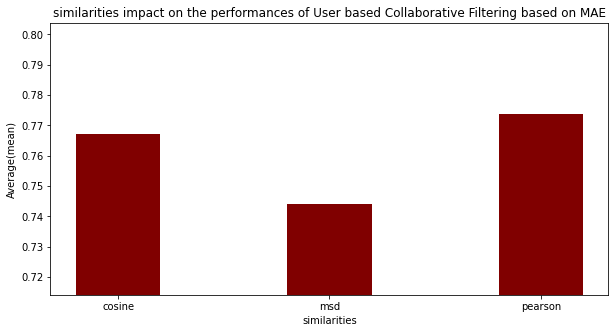

In [130]:
result_data = {'cosine':cosine_ubcf['test_mae'].mean(),'msd':msd_ubcf['test_mae'].mean(),'pearson':pearson_ubcf['test_mae'].mean()}
names = list(result_data.keys())
values = list(result_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
spaced = np.arange(len(names))
plt.bar(spaced, values, color ='maroon', width = 0.4)
plt.xticks(spaced, names)
plt.ylim(min(values) - .03, max(values) + .03)
 
plt.xlabel("similarities")
plt.ylabel("Average(mean)")
plt.title("similarities impact on the performances of User based Collaborative Filtering based on MAE")
plt.show()

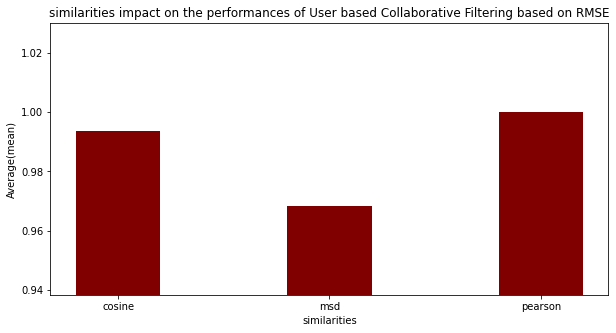

In [131]:
result_data = {'cosine':cosine_ubcf['test_rmse'].mean(),'msd':msd_ubcf['test_rmse'].mean(),'pearson':pearson_ubcf['test_rmse'].mean()}
names = list(result_data.keys())
values = list(result_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
spaced = np.arange(len(names))
plt.bar(spaced, values, color ='maroon', width = 0.4)
plt.xticks(spaced, names)
plt.ylim(min(values) - .03, max(values) + .03)
 
plt.xlabel("similarities")
plt.ylabel("Average(mean)")
plt.title("similarities impact on the performances of User based Collaborative Filtering based on RMSE")
plt.show()

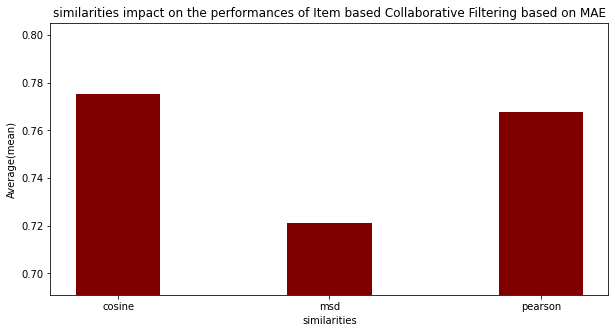

In [132]:
result_data = {'cosine':cosine_ibcf['test_mae'].mean(),'msd':msd_ibcf['test_mae'].mean(),'pearson':pearson_ibcf['test_mae'].mean()}
names = list(result_data.keys())
values = list(result_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
spaced = np.arange(len(names))
plt.bar(spaced, values, color ='maroon', width = 0.4)
plt.xticks(spaced, names)
plt.ylim(min(values) - .03, max(values) + .03)
 
plt.xlabel("similarities")
plt.ylabel("Average(mean)")
plt.title("similarities impact on the performances of Item based Collaborative Filtering based on MAE")
plt.show()

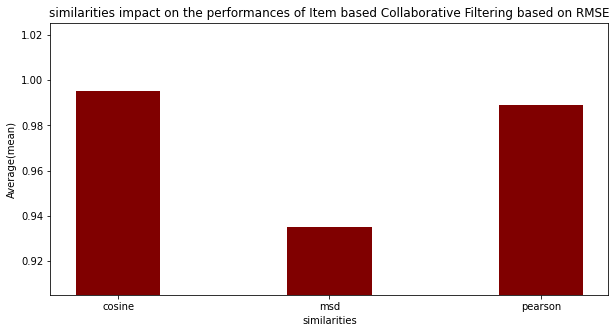

In [133]:
result_data = {'cosine':cosine_ibcf['test_rmse'].mean(),'msd':msd_ibcf['test_rmse'].mean(),'pearson':pearson_ibcf['test_rmse'].mean()}
names = list(result_data.keys())
values = list(result_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
spaced = np.arange(len(names))
plt.bar(spaced, values, color ='maroon', width = 0.4)
plt.xticks(spaced, names)
plt.ylim(min(values) - .03, max(values) + .03)
 
plt.xlabel("similarities")
plt.ylabel("Average(mean)")
plt.title("similarities impact on the performances of Item based Collaborative Filtering based on RMSE")
plt.show()

In [147]:
#number of neighbors impact on the performances of User based Collaborative Filtering
max_mean = 10000
best_neighbour =1
ubcf_results=[]
for x in range(20):
  user_based_CF_neighbours = KNNBasic(sim_options={'user_based': True},k=x)
  UBCF_neigbours = cross_validate(user_based_CF_neighbours, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  ubcf_rmse_mean = UBCF_neigbours['test_rmse'].mean()
  if(ubcf_rmse_mean < max_mean):
    max_mean = ubcf_rmse_mean
    best_neighbour = x
  ubcf_results.append(ubcf_rmse_mean)
print(f'The best neighbour for User based Collaborative Filtering using RMSE is {best_neighbour}and the value is {max_mean}')
print('All results for User based Collaborative Filtering using RMSE is',ubcf_results)
  

  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0575  1.0576  1.0571  1.0565  1.0616  1.0581  0.0018  
MAE (testset)     0.8494  0.8495  0.8490  0.8476  0.8536  0.8498  0.0020  
Fit time          0.14    0.22    0.21    0.23    0.24    0.21    0.03    
Test time         1.74    0.91    1.32    0.93    1.37    1.26    0.31    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [148]:
#number of neighbors impact on the performances of Item based Collaborative Filtering
max_mean = 10000
best_neighbour =1
ibcf_results=[]
for x in range(20):
  item_based_CF_neighbours = KNNBasic(sim_options={'user_based': False},k=x)
  IBCF_neigbours = cross_validate(item_based_CF_neighbours, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  ibcf_rmse_mean = IBCF_neigbours['test_rmse'].mean()
  if(ibcf_rmse_mean < max_mean):
    max_mean = ibcf_rmse_mean
    best_neighbour = x
  ibcf_results.append(ibcf_rmse_mean)
print(f'The best neighbour for Item based Collaborative Filtering using RMSE is {best_neighbour} and the value is {max_mean}')
print('All results for Item based Collaborative Filtering using RMSE is',ibcf_results)
  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0606  1.0602  1.0521  1.0639  1.0536  1.0581  0.0045  
MAE (testset)     0.8531  0.8513  0.8452  0.8528  0.8466  0.8498  0.0033  
Fit time          6.69    5.59    5.46    4.76    5.27    5.55    0.63    
Test time         5.09    3.89    4.66    5.04    4.12    4.56    0.49    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

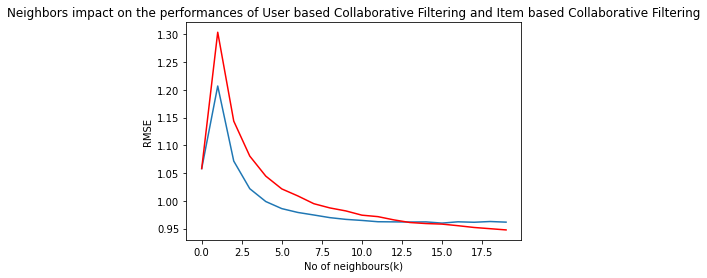

In [149]:
#User based Collaborative Filtering
plt.plot(ubcf_results)

#Item based Collaborative Filtering
plt.plot(ibcf_results,color='red')
  
plt.xlabel("No of neighbours(k)")
plt.ylabel("RMSE")
plt.title('Neighbors impact on the performances of User based Collaborative Filtering and Item based Collaborative Filtering')
plt.show()

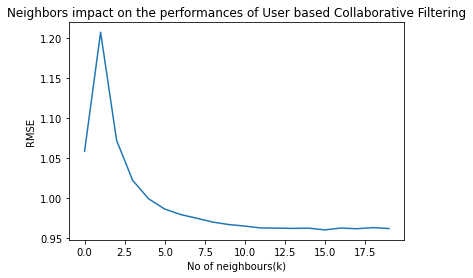

In [151]:
#User based Collaborative Filtering
plt.plot(ubcf_results)  
plt.xlabel("No of neighbours(k)")
plt.ylabel("RMSE")
plt.title('Neighbors impact on the performances of User based Collaborative Filtering')
plt.show()

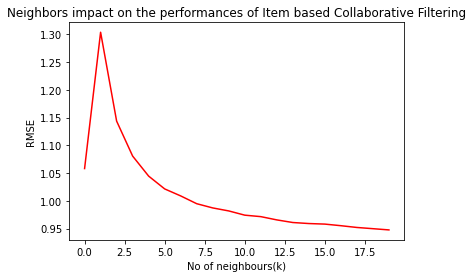

In [153]:
#User based Collaborative Filtering
plt.plot(ibcf_results,color='red')
plt.xlabel("No of neighbours(k)")
plt.ylabel("RMSE")
plt.title('Neighbors impact on the performances of Item based Collaborative Filtering')
plt.show()